In [1]:
#load necessary modukes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from IPython.core.interactiveshell import InteractiveShell
from scipy.stats import zscore

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import decomposition
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

%matplotlib inline 
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:

df = pd.read_csv("..\\dataset\\vehicle.csv")


In [3]:
df.head(2)
df.tail(2)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van

compactness  circularity  distance_circularity  radius_ratio  \
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
844                         66.0             0.0              25.0   
845                         73.0             1.0              18.0   

     skewness_about.2  hollows_ratio class  
844             190.0            195   car  
845             186.0            190   van

In [4]:
df.info()
#class alone is of object type which need to be converted. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [5]:
#Get the unique values in class. 
df['class'].unique()
#Get the break down of the 3 categories
df.groupby(["class"]).count()

array(['van', 'car', 'bus'], dtype=object)

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
bus            218          214                   215           216   
car            429          428                   429           426   
van            199          199                   198           198   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
bus                     217                      218            218   
car                     428                      429            428   
van                     199                      199            199   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
bus              218                     217                        218   
car              428                     428                        429   
van              199                     198                        199   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
class                                                                  
bus                218                218                        216   
car                427                427                        429   
van                198                199                        199   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
class                                                                  
bus                            217             214               218   
car                            426             427               428   
van                            199             199               199   

       skewness_about.2  hollows_ratio  
class                                   
bus                 218            218  
car                 428            429  
van                 199            199

In [6]:
#Convert class into numeric values
df.replace({"class": {"car": 1,"van": 2,"bus": 3}}, inplace = True )
df.groupby(["class"]).count()

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
1              429          428                   429           426   
2              199          199                   198           198   
3              218          214                   215           216   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
1                       428                      429            428   
2                       199                      199            199   
3                       217                      218            218   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
1                428                     428                        429   
2                199                     198                        199   
3                218                     217                        218   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
class                                                                  
1                  427                427                        429   
2                  198                199                        199   
3                  218                218                        216   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
class                                                                  
1                              426             427               428   
2                              199             199               199   
3                              217             214               218   

       skewness_about.2  hollows_ratio  
class                                   
1                   428            429  
2                   199            199  
3                   218            218

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [8]:
df.shape
df.isnull().values.any()
df.isnull().sum().sum()
df.isnull().sum()
df.isin(['?']).sum(axis=0).sum()
#No '?'
#There are 41 null values which need to be treated.

(846, 19)

True

41

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

0

In [9]:
df = df.apply(lambda x: x.fillna(x.median()),axis=0)
df.isnull().values.any()
df.isnull().sum().sum()

False

0

In [10]:
df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    1.750591    0.838691    1.0    1.00   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0  
class                          1.0    3.00     3.0

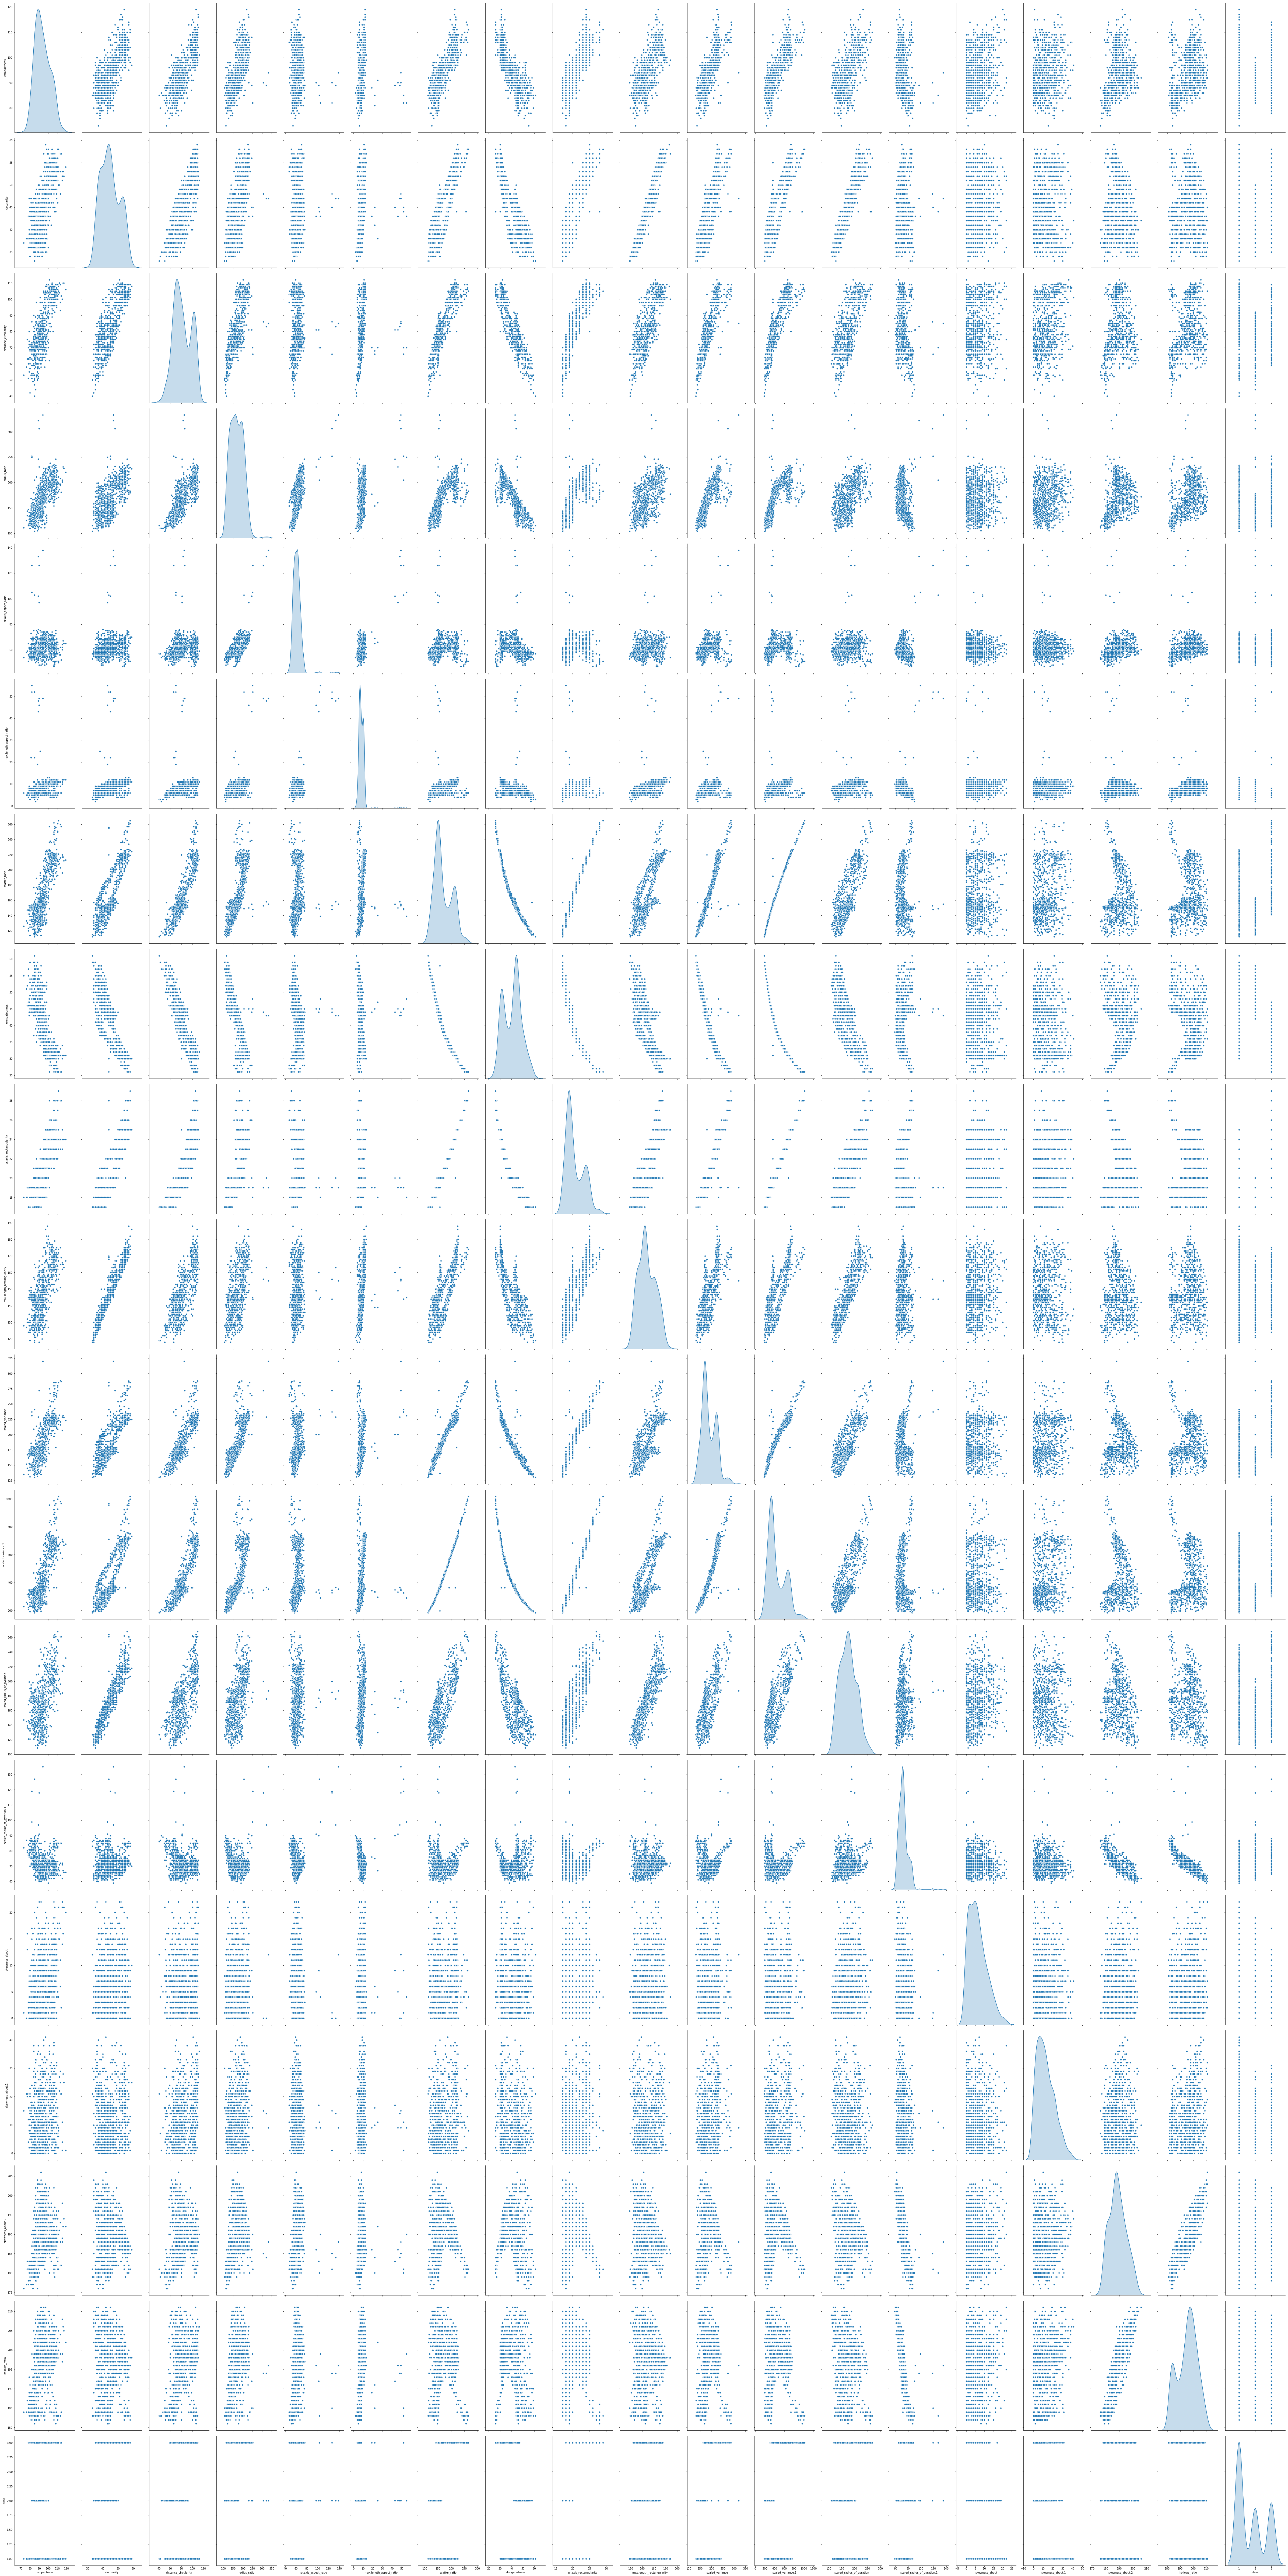

In [11]:
sns.pairplot(df, size=7,aspect=0.5 , diag_kind='kde')

<Figure size 432x288 with 0 Axes>

Text(0.5,0.98,'')

<Figure size 432x288 with 0 Axes>

Text(0.5,0.98,'')

<Figure size 432x288 with 0 Axes>

Text(0.5,0.98,'')

<Figure size 432x288 with 0 Axes>

Text(0.5,0.98,'')

<Figure size 432x288 with 0 Axes>

Text(0.5,0.98,'')

<Figure size 432x288 with 0 Axes>

Text(0.5,0.98,'')

<Figure size 432x288 with 0 Axes>

Text(0.5,0.98,'')

<Figure size 432x288 with 0 Axes>

Text(0.5,0.98,'')

<Figure size 432x288 with 0 Axes>

Text(0.5,0.98,'')

<Figure size 432x288 with 0 Axes>

Text(0.5,0.98,'')

<Figure size 432x288 with 0 Axes>

Text(0.5,0.98,'')

<Figure size 432x288 with 0 Axes>

Text(0.5,0.98,'')

<Figure size 432x288 with 0 Axes>

Text(0.5,0.98,'')

<Figure size 432x288 with 0 Axes>

Text(0.5,0.98,'')

<Figure size 432x288 with 0 Axes>

Text(0.5,0.98,'')

<Figure size 432x288 with 0 Axes>

Text(0.5,0.98,'')

<Figure size 432x288 with 0 Axes>

Text(0.5,0.98,'')

<Figure size 432x288 with 0 Axes>

Text(0.5,0.98,'')

<Figure size 432x288 with 0 Axes>

Text(0.5,0.98,'')

<Figure size 432x288 with 0 Axes>

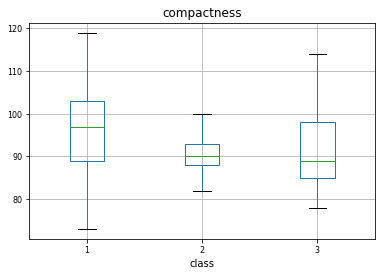

<Figure size 432x288 with 0 Axes>

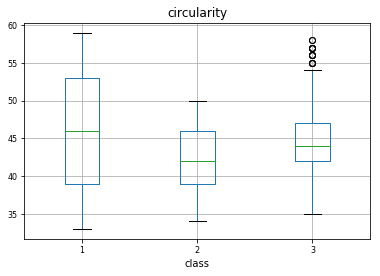

<Figure size 432x288 with 0 Axes>

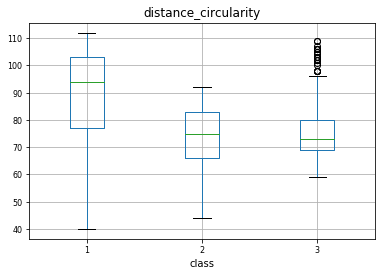

<Figure size 432x288 with 0 Axes>

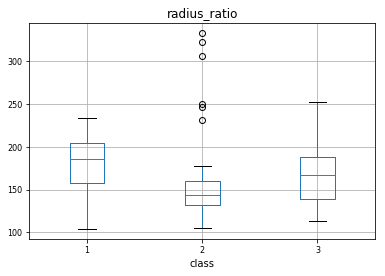

<Figure size 432x288 with 0 Axes>

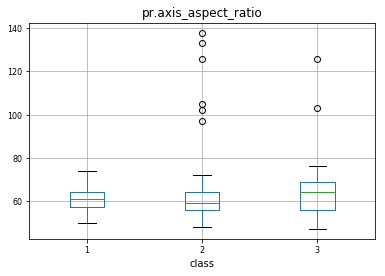

<Figure size 432x288 with 0 Axes>

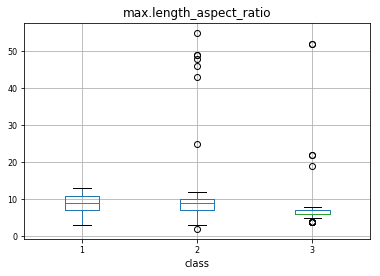

<Figure size 432x288 with 0 Axes>

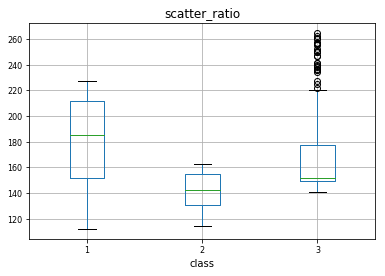

<Figure size 432x288 with 0 Axes>

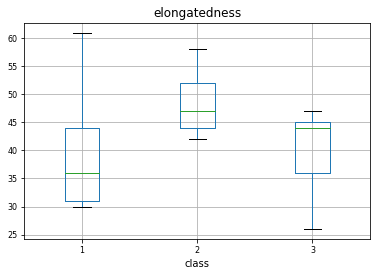

<Figure size 432x288 with 0 Axes>

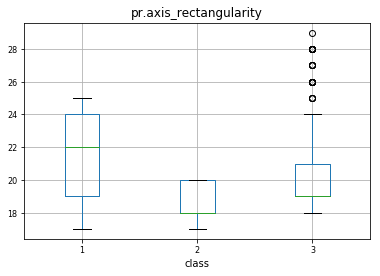

<Figure size 432x288 with 0 Axes>

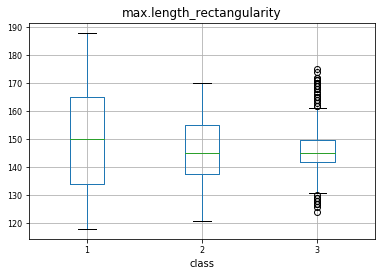

<Figure size 432x288 with 0 Axes>

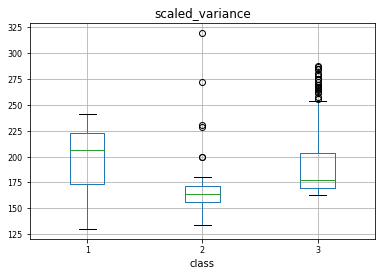

<Figure size 432x288 with 0 Axes>

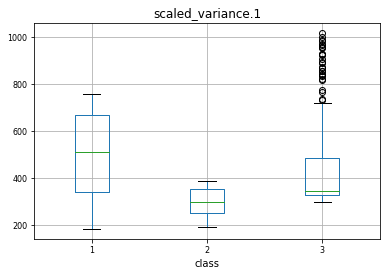

<Figure size 432x288 with 0 Axes>

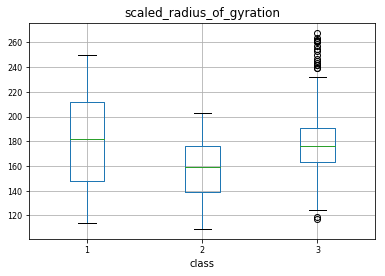

<Figure size 432x288 with 0 Axes>

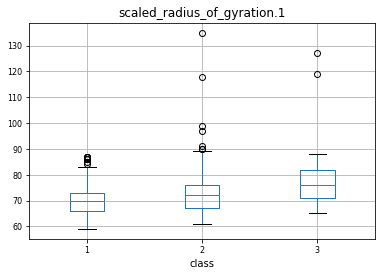

<Figure size 432x288 with 0 Axes>

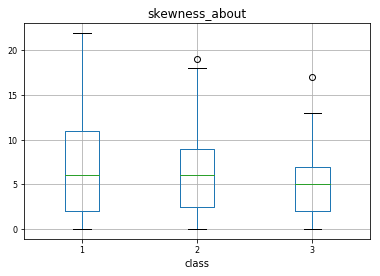

<Figure size 432x288 with 0 Axes>

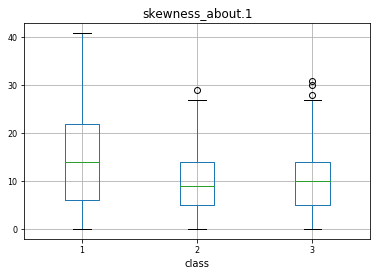

<Figure size 432x288 with 0 Axes>

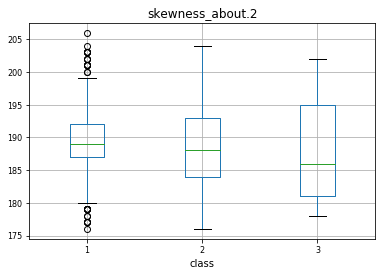

<Figure size 432x288 with 0 Axes>

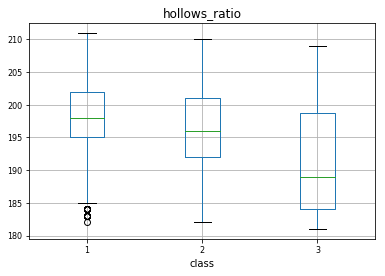

<Figure size 432x288 with 0 Axes>

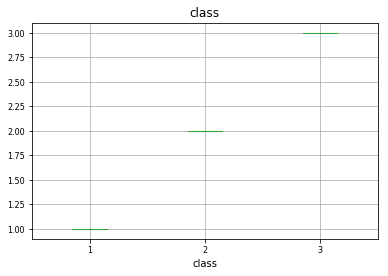

In [12]:

for column in df:
    plt.figure()
    df.boxplot([column], by = 'class',fontsize=8)
    plt.suptitle("")

#The following features have outliers across classes where outliers are seen in more than one class
#pr.axis_aspect_ratio, max_length_aspect_ratio, scaled_variance, scaled_radius_of_gyration.1, skewness_about and skewness_about.1


#The following features have outliers are class specific where outliers are seen in only in one class
#circularity, distance_circularity, radius_ratio, scatter_ratio, pr.axis_rectangularity, max.length_rectangularity, 
#scaled_variance.1, scaled_radius_of_gyration, skewness_about.2, hollows_ratio



In [13]:

df_o = df.copy()
df_o['class'].value_counts()
#Treat the outliers - cap the values at .05 and .95 quantile values for outliers. 
for col in df_o.iloc[:,0:18].columns:
    percentiles = df_o[col].quantile([0.05,0.95]).values
    df_o[col][df_o[col] <= percentiles[0]] = percentiles[0]
    df_o[col][df_o[col] >= percentiles[1]] = percentiles[1]


df_o['class'].value_counts()
df['class'].value_counts()

feature_columns = df.iloc[:,0:18].columns
feature_columns

std_scaler = preprocessing.StandardScaler()
x_stdscaler = std_scaler.fit_transform(df_o.iloc[:,0:18])
x_stdscaler = pd.DataFrame(x_stdscaler, columns=feature_columns)
x_stdscaler.head(2)

mm_scaler = preprocessing.MinMaxScaler()
x_mmscaler = mm_scaler.fit_transform(df_o.iloc[:,0:18])
x_mmscaler = pd.DataFrame(x_mmscaler, columns=feature_columns)
x_mmscaler.head(2)

norm_scaler = preprocessing.Normalizer()
x_normscaler = norm_scaler.fit_transform(df_o.iloc[:,0:18])
x_normscaler = pd.DataFrame(x_normscaler, columns=feature_columns)
x_normscaler.head(2)

y=df['class']
# join back the target column
df_std = x_stdscaler.join(y)  
df_mm = x_mmscaler.join(y)  
df_norm = x_normscaler.join(y)  
df_std.shape
df_mm.shape
df_norm.shape
df_std.head(2)
df_mm.head(2)
df_norm.head(2)


1    429
3    218
2    199
Name: class, dtype: int64

1    429
3    218
2    199
Name: class, dtype: int64

1    429
3    218
2    199
Name: class, dtype: int64

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')

compactness  circularity  distance_circularity  radius_ratio  \
0     0.174400     0.539494              0.047703      0.307700   
1    -0.341933    -0.641609              0.113753     -0.881976   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.834211                 0.877837      -0.205546   
1             -0.805448                 0.390534      -0.624506   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.147106               -0.219255                   0.792108   
1       0.551172               -0.629857                  -0.354842   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.414242          -0.343140                   0.321551   
1        -0.629593          -0.644539                  -0.532785   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.354663       -0.053716          0.430214   
1                    -0.032554        0.595482          0.190687   

   skewness_about.2  hollows_ratio  
0         -0.317609       0.197843  
1          0.020641       0.475184

compactness  circularity  distance_circularity  radius_ratio  \
0     0.500000     0.631579              0.510204      0.568627   
1     0.346154     0.263158              0.530612      0.205882   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.000000                 0.714286       0.379845   
1              0.222222                 0.571429       0.245478   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0          0.500                0.354839                   0.700535   
1          0.625                0.225806                   0.358289   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0         0.355556           0.300601                   0.568675   
1         0.288889           0.202405                   0.318072   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                     0.318182          0.3750          0.535714   
1                     0.409091          0.5625          0.464286   

   skewness_about.2  hollows_ratio  
0          0.373494       0.583333  
1          0.469880       0.666667

compactness  circularity  distance_circularity  radius_ratio  \
0     0.150932     0.076260              0.131867      0.282798   
1     0.158697     0.071501              0.146489      0.245893   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              0.112801                 0.015888       0.257378   
1              0.099403                 0.015695       0.259844   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.066728                0.031775                   0.252612   
1       0.078476                0.033134                   0.249380   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0         0.279621           0.602138                   0.292331   
1         0.296466           0.575493                   0.275539   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                     0.111213        0.009533          0.025420   
1                     0.125562        0.015695          0.024415   

   skewness_about.2  hollows_ratio  
0          0.297097       0.312984  
1          0.329601       0.347040

(846, 19)

(846, 19)

(846, 19)

compactness  circularity  distance_circularity  radius_ratio  \
0     0.174400     0.539494              0.047703      0.307700   
1    -0.341933    -0.641609              0.113753     -0.881976   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.834211                 0.877837      -0.205546   
1             -0.805448                 0.390534      -0.624506   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.147106               -0.219255                   0.792108   
1       0.551172               -0.629857                  -0.354842   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.414242          -0.343140                   0.321551   
1        -0.629593          -0.644539                  -0.532785   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.354663       -0.053716          0.430214   
1                    -0.032554        0.595482          0.190687   

   skewness_about.2  hollows_ratio  class  
0         -0.317609       0.197843      2  
1          0.020641       0.475184      2

compactness  circularity  distance_circularity  radius_ratio  \
0     0.500000     0.631579              0.510204      0.568627   
1     0.346154     0.263158              0.530612      0.205882   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.000000                 0.714286       0.379845   
1              0.222222                 0.571429       0.245478   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0          0.500                0.354839                   0.700535   
1          0.625                0.225806                   0.358289   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0         0.355556           0.300601                   0.568675   
1         0.288889           0.202405                   0.318072   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                     0.318182          0.3750          0.535714   
1                     0.409091          0.5625          0.464286   

   skewness_about.2  hollows_ratio  class  
0          0.373494       0.583333      2  
1          0.469880       0.666667      2

compactness  circularity  distance_circularity  radius_ratio  \
0     0.150932     0.076260              0.131867      0.282798   
1     0.158697     0.071501              0.146489      0.245893   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              0.112801                 0.015888       0.257378   
1              0.099403                 0.015695       0.259844   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.066728                0.031775                   0.252612   
1       0.078476                0.033134                   0.249380   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0         0.279621           0.602138                   0.292331   
1         0.296466           0.575493                   0.275539   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                     0.111213        0.009533          0.025420   
1                     0.125562        0.015695          0.024415   

   skewness_about.2  hollows_ratio  class  
0          0.297097       0.312984      2  
1          0.329601       0.347040      2

In [14]:
df_std['class'].value_counts()
df_mm['class'].value_counts()
df_norm['class'].value_counts()

df_o['class'].value_counts()
df['class'].value_counts()




1    429
3    218
2    199
Name: class, dtype: int64

1    429
3    218
2    199
Name: class, dtype: int64

1    429
3    218
2    199
Name: class, dtype: int64

1    429
3    218
2    199
Name: class, dtype: int64

1    429
3    218
2    199
Name: class, dtype: int64

### 2.  Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

max.length_aspect_ratio        0.132070
elongatedness                  0.088607
distance_circularity           0.083612
scaled_radius_of_gyration.1    0.067771
scaled_variance                0.061243
max.length_rectangularity      0.058450
circularity                    0.056874
scatter_ratio                  0.056158
pr.axis_aspect_ratio           0.056135
scaled_variance.1              0.055958
dtype: float64
max.length_aspect_ratio        0.121568
scaled_radius_of_gyration.1    0.088246
scatter_ratio                  0.072314
pr.axis_aspect_ratio           0.070601
scaled_variance                0.070126
max.length_rectangularity      0.066234
scaled_variance.1              0.065978
pr.axis_rectangularity         0.059830
elongatedness                  0.052342
distance_circularity           0.048803
dtype: float64
max.length_aspect_ratio        0.150897
max.length_rectangularity      0.088082
scaled_radius_of_gyration.1    0.074688
pr.axis_aspect_ratio           0.068511
compactnes

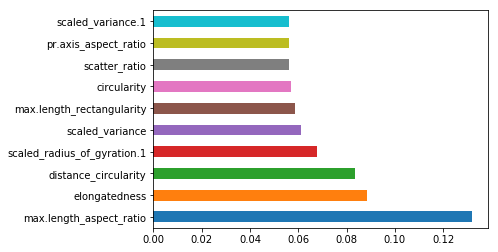

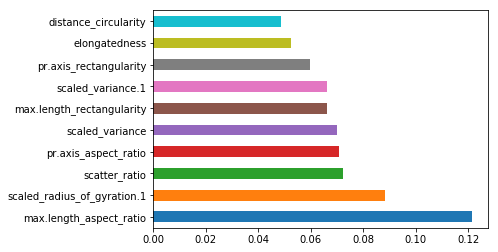

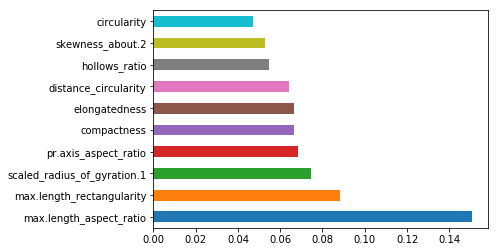

array(['max.length_aspect_ratio', 'elongatedness', 'distance_circularity',
       'scaled_radius_of_gyration.1', 'scaled_variance',
       'max.length_rectangularity', 'circularity', 'scatter_ratio',
       'pr.axis_aspect_ratio', 'scaled_variance.1',
       'pr.axis_rectangularity', 'compactness', 'hollows_ratio',
       'skewness_about.2'], dtype=object)

In [15]:

model_std = ExtraTreesClassifier()
model_mm = ExtraTreesClassifier()
model_norm = ExtraTreesClassifier()

model_std.fit(df_std.iloc[:,0:18],y)
model_mm.fit(df_mm.iloc[:,0:18],y)
model_norm.fit(df_norm.iloc[:,0:18],y)

#print(model.feature_importances_) #use inbuilt class feature_df_o.iloc[:,0:18]importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances_std = pd.Series(model_std.feature_importances_, index=x_stdscaler.columns)
feat_importances_mm = pd.Series(model_mm.feature_importances_, index=x_mmscaler.columns)
feat_importances_norm = pd.Series(model_norm.feature_importances_, index=x_normscaler.columns)

print(feat_importances_std.nlargest(10))
print(feat_importances_mm.nlargest(10))
print(feat_importances_norm.nlargest(10))

feat_importances_std.nlargest(10).plot(kind='barh')
plt.show()
feat_importances_mm.nlargest(10).plot(kind='barh')
plt.show()
feat_importances_norm.nlargest(10).plot(kind='barh')
plt.show()
plt.show()

feat_importances_df=pd.concat([feat_importances_std.nlargest(10), feat_importances_mm.nlargest(10), feat_importances_norm.nlargest(10)]).reset_index()
features_imp=feat_importances_df.iloc[:,0].unique()
features_imp


In [16]:
#Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(df_mm[features_imp],y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features_imp)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
featureScores.nlargest(10,'Score') 

Specs      Score
9             scaled_variance.1  52.699379
7                 scatter_ratio  48.808416
1                 elongatedness  48.288720
10       pr.axis_rectangularity  45.109337
4               scaled_variance  39.984267
0       max.length_aspect_ratio  35.810880
2          distance_circularity  34.078164
3   scaled_radius_of_gyration.1  30.931340
11                  compactness  17.667468
12                hollows_ratio  17.626357

(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x29a790877f0>)

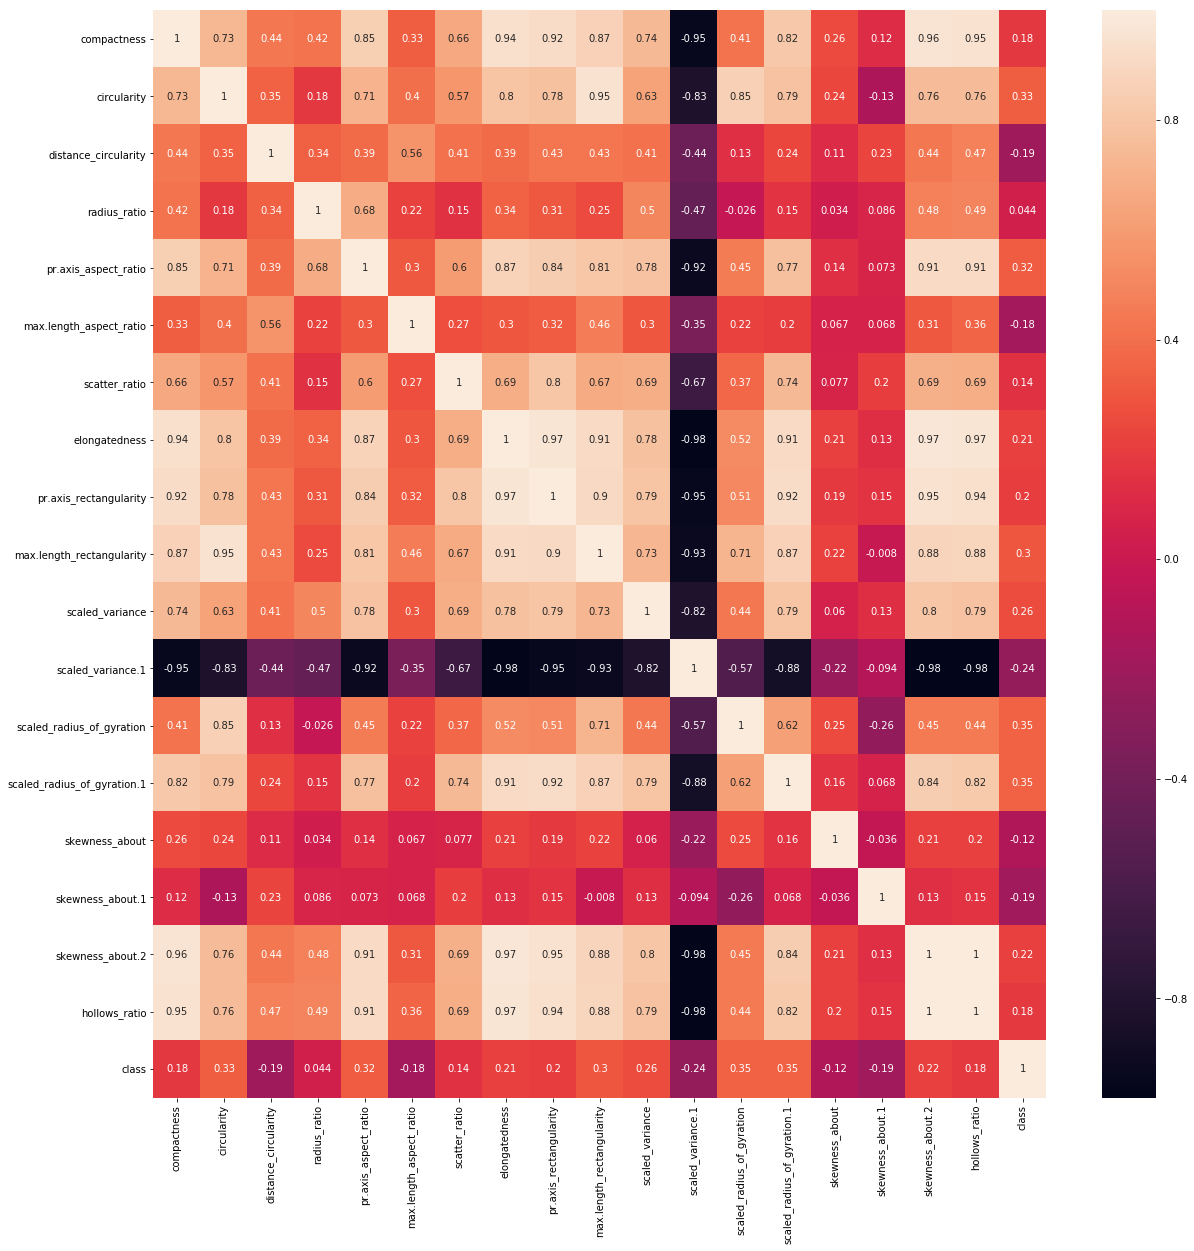

In [17]:
corrmat = df_norm.corr()
plt.subplots(figsize = (20,20))
sns.heatmap(corrmat, annot=True)

### 3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points

array([0.53254453, 0.17587309, 0.07216816, 0.06298786, 0.04638317,
       0.03675718, 0.02623762])

array([53.3, 70.9, 78.1, 84.4, 89. , 92.7, 95.3])

7

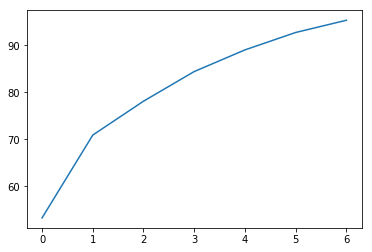

In [18]:

pca = PCA(.95)


principalComponents = pca.fit_transform(df_std)
variance = pca.explained_variance_ratio_ 
variance
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var

#Plotting out cumulative variance to visually determine the cut-off point
plt.plot(var)
pca.n_components_

In [19]:
df_std_pca = pca.transform(df_std)
pd.DataFrame(df_std_pca).shape
pd.DataFrame(df_std_pca).head(2)
x=pd.DataFrame(df_std_pca)
y=df_std['class']
x.head(2)
y.head(2)
x.shape
y.shape

(846, 7)

0         1         2         3         4         5         6
0  0.589635 -0.478320  0.871628  0.185253 -0.837482  1.686072 -0.559963
1 -1.593516 -0.401716 -0.997156  0.500852 -0.119447  0.133744 -0.609413

0         1         2         3         4         5         6
0  0.589635 -0.478320  0.871628  0.185253 -0.837482  1.686072 -0.559963
1 -1.593516 -0.401716 -0.997156  0.500852 -0.119447  0.133744 -0.609413

0    2
1    2
Name: class, dtype: int64

(846, 7)

(846,)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=10)

### 4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

In [21]:
param_grid = {'C':[.01,.05,.5,1],'kernel':['linear','rbf']}
svm = SVC()
clf = GridSearchCV(svm, param_grid,refit = True, verbose=2)
clf.fit(X_train,y_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.01, kernel=linear ...........................................
[CV] .................................. C=0.01, kernel=linear -   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .................................. C=0.01, kernel=linear -   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .................................. C=0.01, kernel=linear -   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ..................................... C=0.01, kernel=rbf -   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ..................................... C=0.01, kernel=rbf -   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ..................................... C=0.01, kernel=rbf -   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.0s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [22]:
# View the best parameters for the model found using grid search
print('Best C:',clf.best_estimator_.C,"\n") 
print('Best Kernel:',clf.best_estimator_.kernel,"\n")
print('Best Gamma:',clf.best_estimator_.gamma,"\n")
print('Best params:',clf.best_params_,"\n")

final_model = clf.best_estimator_


Best C: 1 

Best Kernel: linear 

Best Gamma: auto 

Best params: {'C': 1, 'kernel': 'linear'} 

